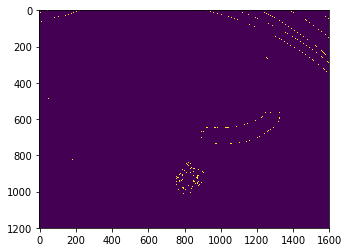

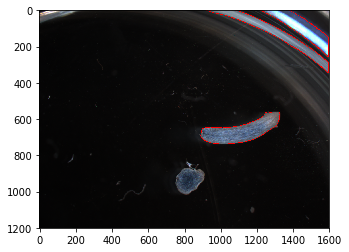

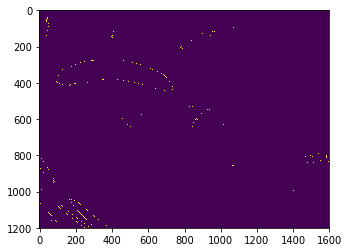

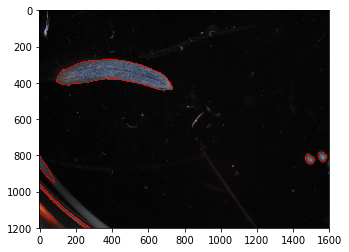

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from finalProject import *


planaria1 = cv2.imread('W12-PT-D11.TIF')
planaria2 = cv2.imread('W12-PT-D9.TIF')

contours = contourPlanaria(planaria1)
contours = sorted(contours, key = cv2.contourArea, reverse = True)
contour_list = []
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 250:
        contour_list.append(contour)
final = cv2.drawContours(planaria1, contour_list, contourIdx = -1, 
                         color = (255, 0, 0), thickness = 2)
plt.imshow(final, cmap='gray')
plt.show()

contours2 = contourPlanaria(planaria2)
contours2 = sorted(contours2, key = cv2.contourArea, reverse = True)
contour_list2 = []
for contour2 in contours2:
    area2 = cv2.contourArea(contour2)
    if area2 > 250:
        contour_list2.append(contour2)
final2 = cv2.drawContours(planaria2, contour_list2, contourIdx = -1, 
                         color = (255, 0, 0), thickness = 2)
plt.imshow(final2, cmap='gray')
plt.show()


In [2]:
xs = [pt[0][0] for pt in contour_list[0]]
ys = [pt[0][1] for pt in contour_list[0]]

contour_complex = np.empty(len(xs), dtype=complex)
#the x coordinates of the points on the contour
contour_complex.real= xs
# the y coordinates of the points on the contour
contour_complex.imag= ys

xs2 = [pt[0][0] for pt in contour_list2[0]]
ys2 = [pt[0][1] for pt in contour_list2[0]]

contour_complex2 = np.empty(len(xs2), dtype=complex)
#the x coordinates of the points on the contour
contour_complex2.real= xs2
# the y coordinates of the points on the contour
contour_complex2.imag= ys2

In [3]:
fourier_result = np.fft.fft(contour_complex)
fourier_result2 = np.fft.fft(contour_complex2)


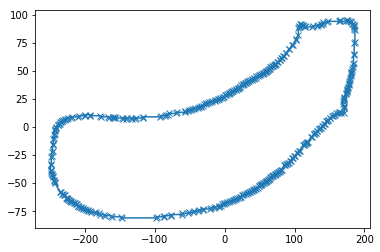

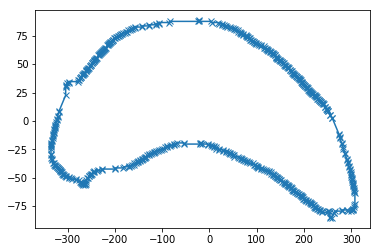

In [4]:
fourier_result[0] = 0
new_contour = np.fft.ifft(fourier_result)
plt.plot(new_contour.real,-1*new_contour.imag,'x-')
plt.show()

fourier_result2[0] = 0
new_contour2 = np.fft.ifft(fourier_result2)
plt.plot(new_contour2.real,-1*new_contour2.imag,'x-')
plt.show()

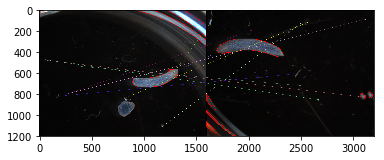

(<matplotlib.image.AxesImage at 0x12c54b550>, None)

In [5]:
# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints and descriptors with ORB
newimg = new_contour.real,-1*new_contour.imag
newimg2 = new_contour2.real,-1*new_contour2.imag
kp1, des1 = orb.detectAndCompute(final,None)
kp2, des2 = orb.detectAndCompute(final2,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv2.drawMatches(final,kp1,final2,kp2,matches[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()